Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta1, beta2, beta3, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 44 seconds.


         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  33.108  2.585  28.134   37.867      0.041    0.029    3954.0    4544.0   
beta1   2.479  0.019   2.446    2.516      0.000    0.000    4724.0    5083.0   
beta2   9.555  0.481   8.609   10.434      0.006    0.004    5809.0    5115.0   
beta3  -3.013  0.198  -3.385   -2.638      0.003    0.002    6040.0    4987.0   
sigma   5.564  0.409   4.845    6.343      0.005    0.004    6211.0    4410.0   

       r_hat  
alpha    1.0  
beta1    1.0  
beta2    1.0  
beta3    1.0  
sigma    1.0  


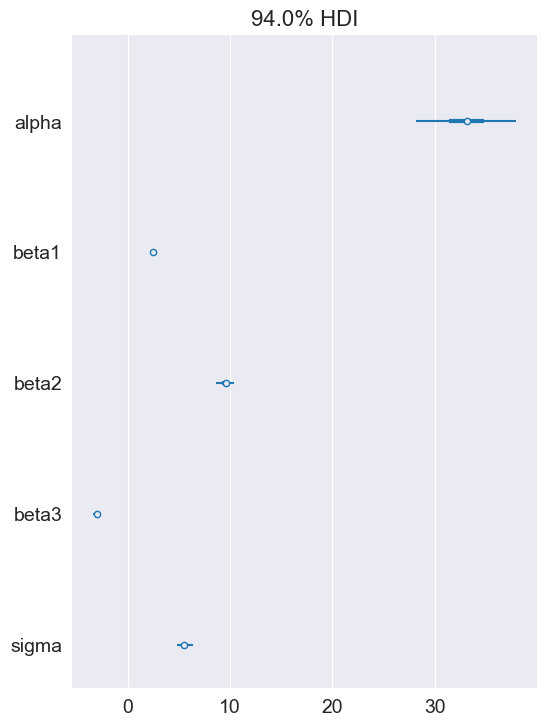

In [4]:
import pandas as pd
import numpy as np
import pymc as pm

# Read the CSV file
df = pd.read_csv('real_estate_data.csv')

# Use 'Speed' and the logarithm of 'HardDrive' as predictors
X = df[['Surface_area', 'Rooms','Distance_to_center']].values
y = df['Price'].values

with pm.Model() as model:
    # Priors
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta1 = pm.Normal('beta1', mu=0, sigma=10)
    beta2 = pm.Normal('beta2', mu=0, sigma=10)
    beta3 = pm.Normal('beta3', mu=0, sigma=10)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # Linear regression
    mu = alpha + beta1*X[:,0] + beta2*X[:,1] + beta3*X[:,2]
    
    # Likelihood
    y_obs = pm.Normal('y', mu=mu, sigma=sigma, observed=y)
    
    # Inference
    idata = pm.sample(2000, return_inferencedata=True)
    
# Plot the 95% credible intervals
pm.plot_forest(idata, combined=True)

# Print the summary of the model
print(pm.summary(idata))



array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta1'}>,
        <Axes: title={'center': 'beta1'}>],
       [<Axes: title={'center': 'beta2'}>,
        <Axes: title={'center': 'beta2'}>],
       [<Axes: title={'center': 'beta3'}>,
        <Axes: title={'center': 'beta3'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

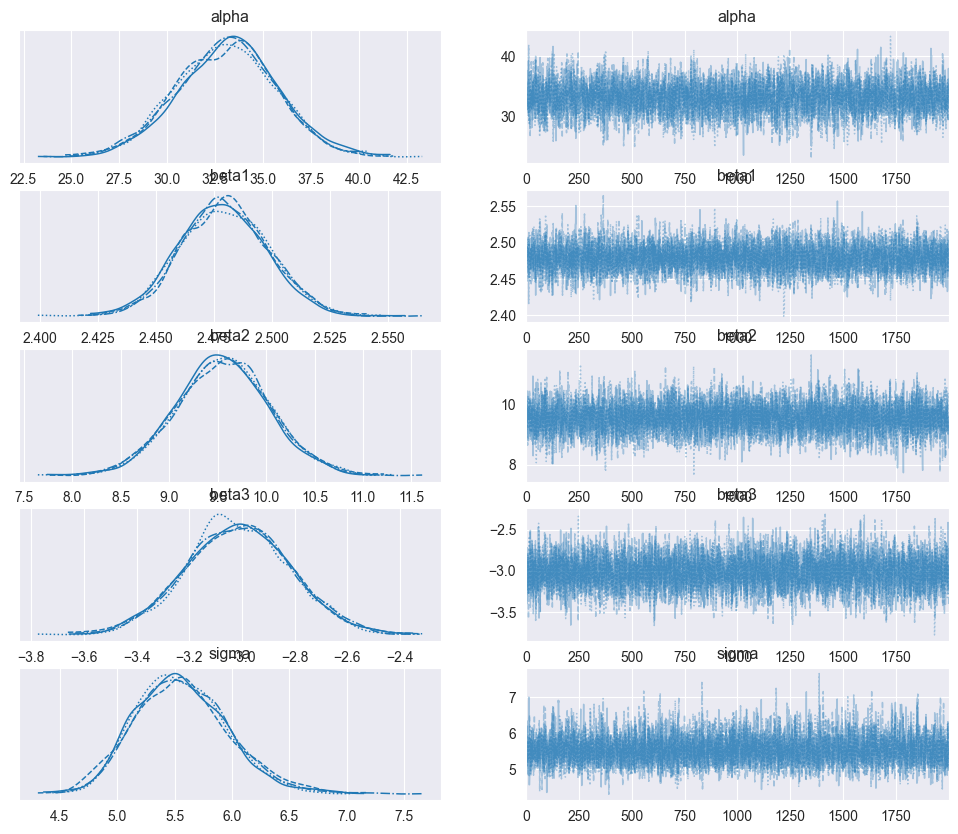

In [5]:
# Plot the posterior distributions
pm.plot_trace(idata)


Pe baza rezultatelor obținute, putem observa că variabilele independente 'Surface_area', 'Rooms' și 'Distance_to_center' sunt semnificative pentru predicția prețului unei proprietăți imobiliare. De asemenea, putem observa că variabilele independente 'Surface_area' și 'Rooms' sunt pozitiv corelate cu prețul unei proprietăți imobiliare, în timp ce variabila independentă 'Distance_to_center' este negativ corelată cu prețul unei proprietăți imobiliare. În concluzie, putem spune că proprietățile imobiliare cu o suprafață mai mare și cu un număr mai mare de camere sunt mai scumpe, în timp ce proprietățile imobiliare situate la o distanță mai mare de centrul orașului sunt mai ieftine.

Cel mai important atribut al unei proprietăți imobiliare este suprafața acesteia, deoarece coeficientul asociat variabilei independente 'Surface_area' este cel mai mare. Acest lucru înseamnă că o creștere a suprafeței unei proprietăți imobiliare cu o unitate va duce la o creștere a prețului acesteia cu aproximativ aproximativ 2.5 unități.